In [1]:
import gym
import numpy as np

import time

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [3]:
import matplotlib.pyplot as plt

In [4]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [5]:
import torch

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import models.rnn as rnns
import models.mlp as mlps
import models.linear as linears
import control.agents as agents
import control.environments as env

In [8]:
from utils.notifications import Slack

In [9]:
import copy

# Setup

In [10]:
environment = env.OverSimplifiedEnvironment(
    environment=gym.make('Breakout-ram-v0'), 
    agent=None,
    verbose=True,
    max_steps=300,
    capacity=5000,
    representation_method='mixed',
    mixed_threshold=10,
    max_tiling=5
)

/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [11]:
input_dimension = environment.get_input_dimension()
n_actions = environment.n_actions
print("Input dimension: {}; number of actions: {}".format(input_dimension, n_actions))

Input dimension: 930; number of actions: 3


In [12]:
model = linears.Linear(input_dimension=input_dimension, n_actions=n_actions)
optimiser = torch.optim.Adam(model.parameters(), lr=.005)
agent = agents.DQNAgent(model, optimiser, gamma=.999, temperature=10, algorithm='expsarsa', n_actions=n_actions)

environment.agent = agent

# Experiment

In [13]:
agent.commit()

100%|###############################################################| 10/10 [01:18<00:00,  7.99s/it]


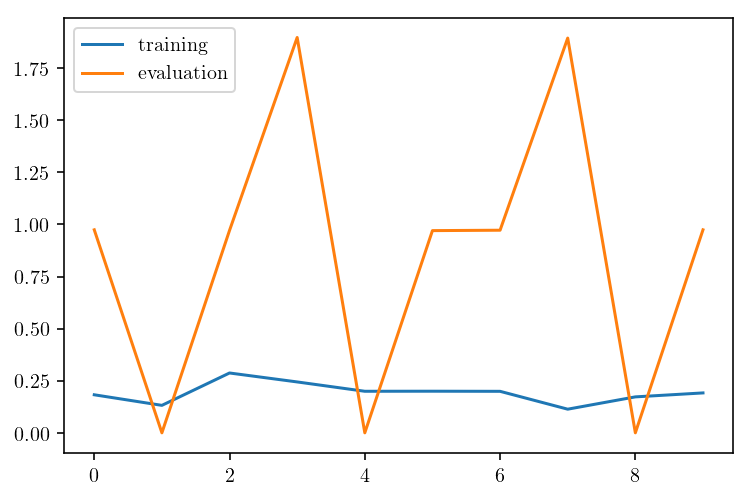

(0.0, 32)

In [14]:
returns = environment.train(segments=10, episodes=100)

plt.figure()
plt.plot(returns.T[0], label='training')
plt.plot(returns.T[1], label='evaluation')
plt.legend()
plt.show()

environment.exploration_episode(render=True)

## Training

100%|###############################################################| 10/10 [02:49<00:00, 17.53s/it]


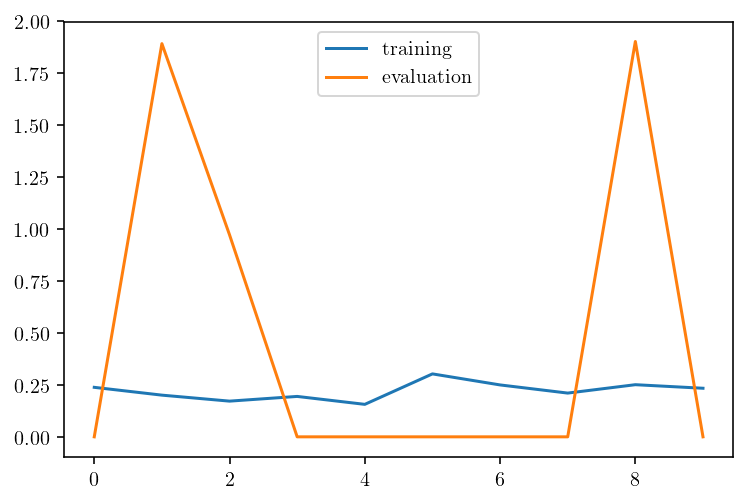

100%|###############################################################| 10/10 [03:21<00:00, 20.77s/it]


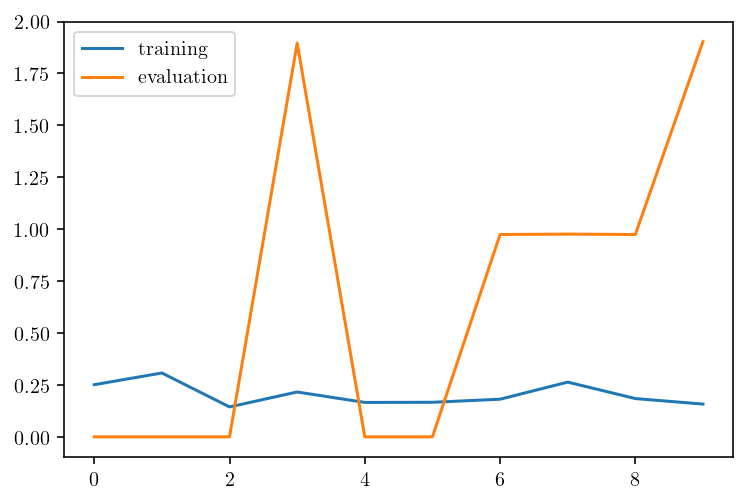

100%|###############################################################| 10/10 [03:35<00:00, 21.55s/it]


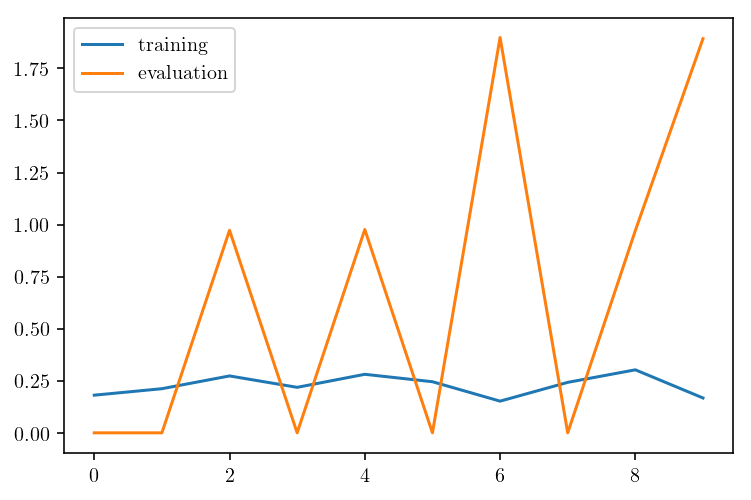

 60%|######################################4                         | 6/10 [02:18<01:30, 22.69s/it]

In [ ]:
agent.temperature = 10

for _ in range(10):
    
    returns = environment.train(segments=10, episodes=200)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .8

## Testing

In [54]:
for _ in range(5):
    environment.exploration_episode(render=True)

In [45]:
for _ in range(3):
    environment.evaluation_episode(render=True)

## Save

Don't work

In [42]:
environment.save('../saved/')

PicklingError: Can't pickle <class 'control.utils.ReplayMemory'>: it's not the same object as control.utils.ReplayMemory

In [56]:
activated_bytes = environment.features
min_bytes = environment.min_range
max_bytes = environment.max_range
bytes_range = max_bytes - min_bytes
tilings = environment.tilings

In [57]:
print(("{} activated bytes (coded on {} integers in total): " + ", ".join([str(x) for x in activated_bytes])).format(len(activated_bytes), len(activated_bytes) + sum(bytes_range)))
print()
print("Min bytes: " + ", ".join([str(x) for x in min_bytes]))
print()
print("Max bytes: " + ", ".join([str(x) for x in max_bytes]))
print()
print("Bytes ranges: " + ", ".join([str(x) for x in bytes_range]))
print()
print("Tilings: {}".format(tilings))


26 activated bytes (coded on 3074 integers in total): 30, 49, 57, 70, 71, 72, 74, 75, 77, 84, 86, 90, 91, 94, 95, 96, 99, 100, 101, 103, 105, 106, 107, 119, 121, 122

Min bytes: 0, 225, 4, 0, 1, 55, 2, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 150

Max bytes: 192, 240, 5, 184, 6, 191, 8, 13, 1, 5, 25, 255, 3, 228, 135, 28, 232, 128, 208, 255, 255, 128, 129, 255, 150, 246

Bytes ranges: 192, 15, 1, 184, 5, 136, 6, 13, 1, 5, 5, 255, 3, 228, 135, 28, 232, 128, 208, 255, 255, 128, 129, 255, 150, 96

Tilings: [4, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 5, 3, 1, 5, 3, 5, 5, 5, 3, 3, 5, 3, 2]


In [11]:
m, M = environment.bytes_evolution_range(n_episodes_exploration=1000, n_episodes_evaluation=100)

activated_bytes = np.nonzero(M - m)[0]
min_bytes = m[activated_bytes]
max_bytes = M[activated_bytes]
bytes_range = max_bytes - min_bytes

AttributeError: 'NoneType' object has no attribute 'reset'

In [59]:
print(("{} activated bytes (coded on {} integers in total): " + ", ".join([str(x) for x in activated_bytes])).format(len(activated_bytes), len(activated_bytes) + sum(bytes_range)))
print()
print("Min bytes: " + ", ".join([str(x) for x in min_bytes]))
print()
print("Max bytes: " + ", ".join([str(x) for x in max_bytes]))
print()
print("Bytes ranges: " + ", ".join([str(x) for x in bytes_range]))


34 activated bytes (coded on 3555 integers in total): 0, 12, 18, 19, 24, 25, 49, 57, 70, 71, 72, 74, 75, 77, 84, 86, 90, 91, 94, 95, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 119, 121, 122

Min bytes: 15, 207, 207, 243, 15, 252, 225, 4, 0, 1, 55, 2, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 150

Max bytes: 63, 255, 255, 255, 255, 255, 240, 5, 184, 6, 191, 8, 13, 4, 20, 25, 255, 3, 226, 135, 28, 220, 128, 209, 128, 255, 128, 255, 128, 132, 2, 255, 150, 246

Bytes ranges: 48, 48, 48, 12, 240, 3, 15, 1, 184, 5, 136, 6, 13, 4, 20, 5, 255, 3, 226, 135, 28, 220, 128, 209, 128, 255, 128, 255, 128, 132, 2, 255, 150, 96


In [62]:
new_bytes = [x for x in activated_bytes if x not in environment.features]
new_min_bytes = m[new_bytes]
new_max_bytes = M[new_bytes]
new_bytes_range = new_max_bytes - new_min_bytes

In [63]:
print(("{} new bytes: " + ", ".join([str(x) for x in new_bytes])).format(len(new_bytes)))
print()
print("Min bytes: " + ", ".join([str(x) for x in new_min_bytes]))
print()
print("Max bytes: " + ", ".join([str(x) for x in new_max_bytes]))
print()
print("Bytes ranges: " + ", ".join([str(x) for x in new_bytes_range]))


9 new bytes: 0, 12, 18, 19, 24, 25, 102, 104, 109

Min bytes: 15, 207, 207, 243, 15, 252, 0, 0, 0

Max bytes: 63, 255, 255, 255, 255, 255, 128, 128, 2

Bytes ranges: 48, 48, 48, 12, 240, 3, 128, 128, 2
